In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
rate = pd.read_csv('exchange_rate.csv')

In [3]:
rate

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [4]:
exrate = rate.copy()

In [7]:
exrate['date'] = pd.to_datetime(exrate['date'], format='%d-%m-%Y %H:%M', errors='coerce')

In [8]:
# Create a new column with only the date part
exrate['date'] = exrate['date'].dt.strftime('%Y-%m-%d')

In [9]:
#save the updated datset
exrate.to_csv('exrate.csv',index=False)

In [10]:
print(exrate.head())

         date  Ex_rate
0  1990-01-01   0.7855
1  1990-01-02   0.7818
2  1990-01-03   0.7867
3  1990-01-04   0.7860
4  1990-01-05   0.7849


In [11]:
exrate.columns

Index(['date', 'Ex_rate'], dtype='object')

In [12]:
exrate.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [13]:
exrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [14]:
exrate.isnull().sum()

date       0
Ex_rate    0
dtype: int64

<Axes: >

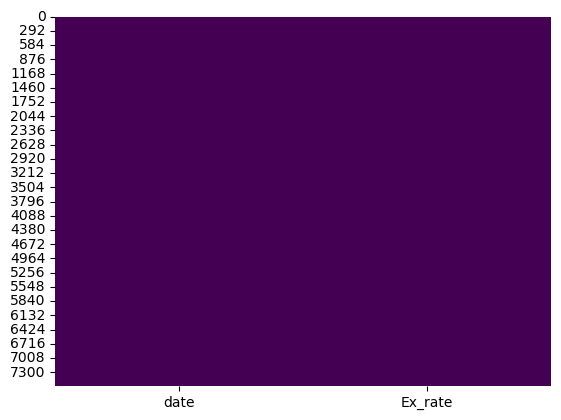

In [15]:
sns.heatmap(exrate.isnull(),cbar=False,cmap='viridis')

In [16]:
exrate.duplicated().sum()

0

IN the above dataset there are no null values and duplicate values.

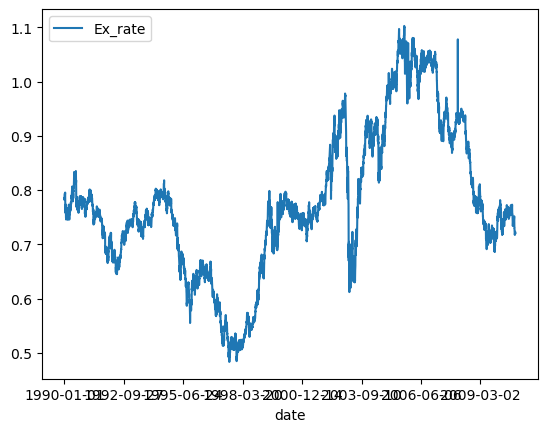

In [17]:
#line plot of time series
from matplotlib import pyplot
exrate.plot(x='date',y='Ex_rate',kind='line')
pyplot.show()

array([[<Axes: title={'center': 'Ex_rate'}>]], dtype=object)

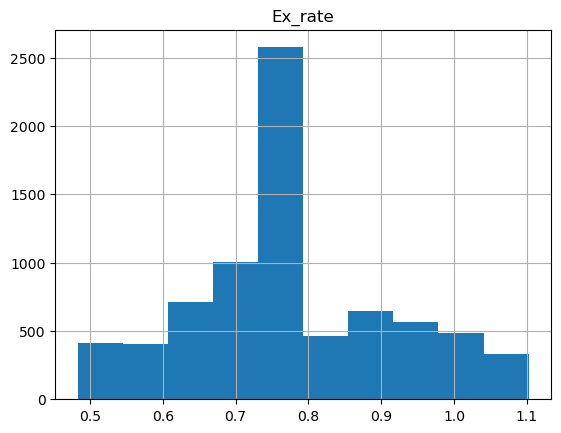

In [18]:
exrate.hist()

Ex_rate    Axes(0.125,0.53;0.352273x0.35)
dtype: object

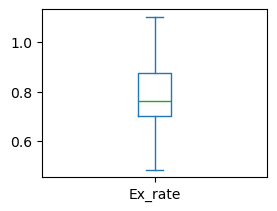

In [19]:
exrate.plot(kind='box',subplots=True,layout=(2,2),sharex=False)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

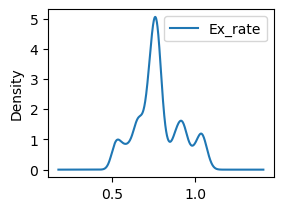

In [20]:
exrate.plot(kind='density',subplots=True,layout=(2,2),sharex=False)

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

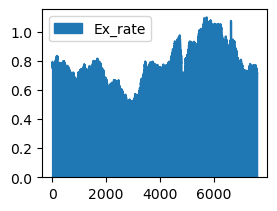

In [21]:
exrate.plot(kind='area',subplots=True,layout=(2,2),sharex=False )

<Axes: >

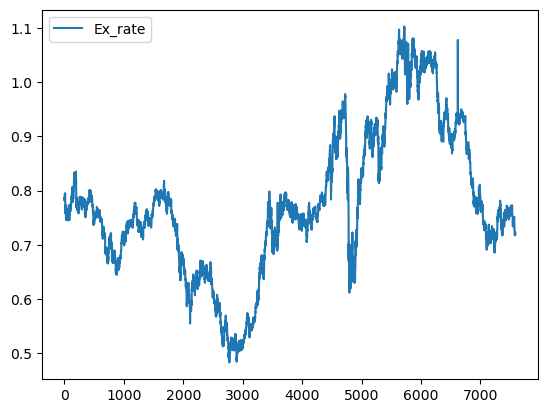

In [22]:
exrate.plot(kind='line')

In [23]:
#seperate out a validation dataset to provide and is used to split a time series dataset into a training set
split_point = len(exrate) - 365
dataset, validation = exrate[0:split_point], exrate[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 7223, Validation 365


Base Model/ Persistence:

In [24]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True)

# Ensure that the index is properly parsed as datetime (if needed)
train.index = pd.to_datetime(train.index)

# Select only numeric data for conversion
numeric_data = train.select_dtypes(include=['float64', 'int64'])
X = numeric_data.values
X = X.astype('float32')

# Split data
train_size = int(len(X) * 0.50)  # Use 50% of the data for training
train_data, test_data = X[0:train_size], X[train_size:]

In [25]:
# walk-forward validation
history = [x for x in train.values.flatten()]  # Extract values and flatten the array
predictions = list()
# Use test_data instead of test
for i in range(len(test_data)):
    yhat = history[-1]
    predictions.append(yhat)  # Appending single element
# observation
    obs = test_data[i, 0]  # Use test_data instead of test and access scalar element
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test_data, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=0.728, Expected=0.737
>Predicted=0.737, Expected=0.742
>Predicted=0.742, Expected=0.747
>Predicted=0.747, Expected=0.746
>Predicted=0.746, Expected=0.745
>Predicted=0.745, Expected=0.746
>Predicted=0.746, Expected=0.748
>Predicted=0.748, Expected=0.749
>Predicted=0.749, Expected=0.746
>Predicted=0.746, Expected=0.746
>Predicted=0.746, Expected=0.756
>Predicted=0.756, Expected=0.757
>Predicted=0.757, Expected=0.764
>Predicted=0.764, Expected=0.757
>Predicted=0.757, Expected=0.760
>Predicted=0.760, Expected=0.760
>Predicted=0.760, Expected=0.765
>Predicted=0.765, Expected=0.770
>Predicted=0.770, Expected=0.770
>Predicted=0.770, Expected=0.774
>Predicted=0.774, Expected=0.782
>Predicted=0.782, Expected=0.776
>Predicted=0.776, Expected=0.784
>Predicted=0.784, Expected=0.783
>Predicted=0.783, Expected=0.786
>Predicted=0.786, Expected=0.786
>Predicted=0.786, Expected=0.793
>Predicted=0.793, Expected=0.789
>Predicted=0.789, Expected=0.777
>Predicted=0.777, Expected=0.777
>Predicted

# ARIMA Hyperparameters:

In [26]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    numeric_data = X.select_dtypes(include=['float64', 'int64'])
    X = numeric_data.values
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [27]:
rmse

0.007310430622606698

Grid Search for p,d,q values:

In [28]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [29]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    # Extract numeric columns before casting to float32
    numeric_data = dataset.select_dtypes(include=['float64', 'int64'])
    dataset = numeric_data.values.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)

Build Model Based on the optimized values:

In [30]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [31]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
# Keep X as the DataFrame to use select_dtypes
X = train
numeric_data = X.select_dtypes(include=['float64', 'int64'])
# Now extract the values from the numeric DataFrame
X = numeric_data.values
X = X.astype('float32')

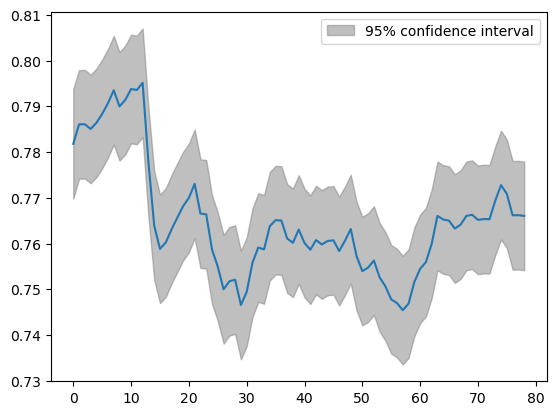

In [32]:
# fit model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict # Import plot_predict function
import matplotlib.pyplot as plt # Import matplotlib for plotting

model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]

# Use the imported plot_predict function
fig, ax = plt.subplots()
plot_predict(model_fit, start=1, end=79, ax=ax)
plt.show()

# Combine the train and test data and build the final model:

In [33]:
# fit model
data = read_csv('exchange_rate.csv', header=0, index_col=0, parse_dates=True)
# Keep X as the DataFrame to use select_dtypes
X = train
numeric_data = X.select_dtypes(include=['float64', 'int64'])
# Now extract the values from the numeric DataFrame
X = numeric_data.values
X = X.astype('float32')

In [34]:
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()

In [35]:
forecast=model_fit.forecast(steps=10)[0]

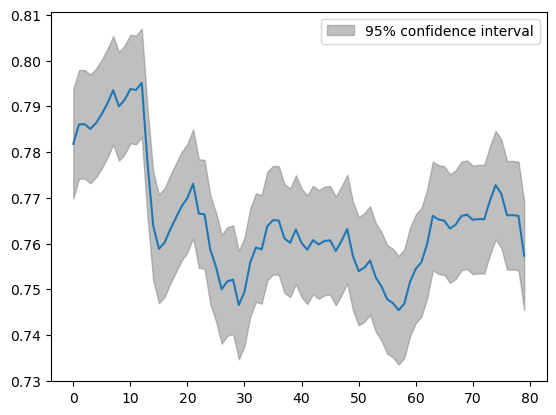

In [36]:
# Import the plot_predict function
from statsmodels.graphics.tsaplots import plot_predict
import matplotlib.pyplot as plt

# Use the plot_predict function, passing in the fitted model
fig, ax = plt.subplots()
plot_predict(model_fit, start=1, end=80, ax=ax)
plt.show()